<a href="https://colab.research.google.com/github/jcmachicao/uc_AI_finanzas/blob/main/AI_finanzas__ejemplosNLP_dataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [16]:
# Paso 1: Scraping de titulares de Yahoo Finance
url = "https://finance.yahoo.com/topic/stock-market-news/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
#print(soup)

# Extraer titulares
headlines_1 = soup.find_all("h3", class_="yf-18q3fnf")
titles_1 = [headline.text for headline in headlines_1]

print("Titulares extraídos:")
for i, title in enumerate(titles_1):
    print(f"{i}. {title}")

Titulares extraídos:
0. Cathie Wood sells $5 million of surging tech stock
1. OPEC’s market power is ‘less than you would imagine’ and the US doesn’t need to get fussed over the cartel, State Dept. official says
2. A longtime stock market bear is rethinking his view after this year's dizzying rally
3. SpaceX and Palantir now have bigger valuations than top aerospace-defense stocks as the military eyes transformation
4. How AT&T Stock (NYSE:T) Is Back to Its Winning Ways
5. Wall Street Fixer Bisignano Eyes Worst Mess Yet: Social Security
6. Billionaires have been beating the stock market — where they are putting their money now, according to UBS
7. The next S&P 500 shake-up could usher in Coinbase, Block, or these other stocks
8. Wall Street isn’t worried about a stock-market crash. That’s why you should be.
9. The housing market should pick up next year, but the path looks choppy
10. UnitedHealth Backlash Signals Possible Shift in Washington and on Wall Street
11. CONX Enhances Market 

subtle-link fin-size-small thumb yf-1e4diqp

[*********************100%***********************]  1 of 1 completed


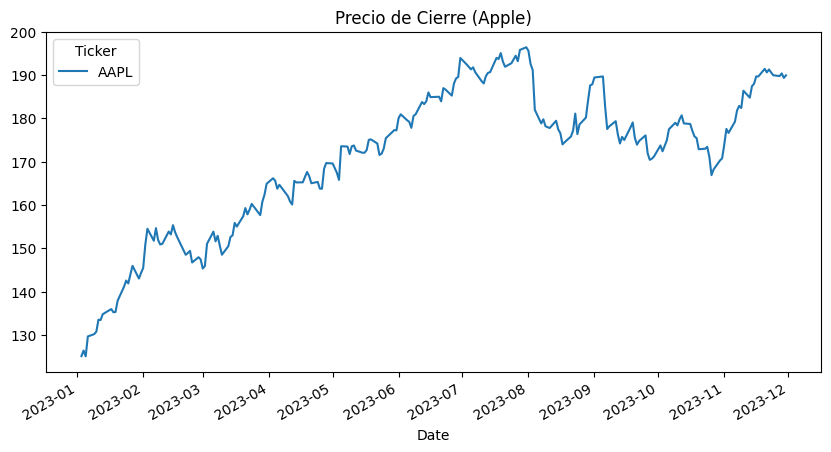

In [24]:
# Paso 2: Obtener datos financieros (Apple como ejemplo)
ticker = "AAPL"  # Apple Inc.
data = yf.download(ticker, start="2023-01-01", end="2023-12-01")

# Calcular retornos diarios
data['Daily Return'] = data['Close'].pct_change()

# Visualizar precios y retornos
data['Close'].plot(title="Precio de Cierre (Apple)", figsize=(10, 5))
plt.show()

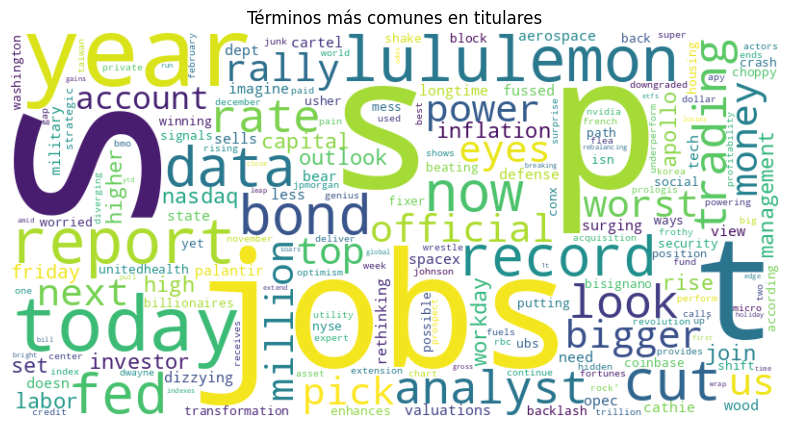

In [25]:
# Paso 3: Relacionar términos con stock values (nube de palabras)
text = " ".join(titles_1)  # Concatenar titulares
text_2 = text.lower().replace('stock',' ').replace('market', '').replace('wall', '').replace('street', '').replace('says', '')
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_2)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Términos más comunes en titulares")
plt.show()